In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import numpy as np

MNIST DataSet

In [2]:
mnist = tf.keras.datasets.mnist

Training :- (60000, 28, 28)
Testing :- (10000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0

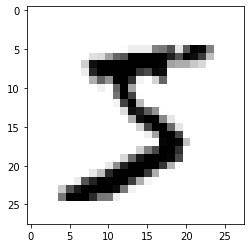

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#28*28 sized imaged of 0-9
print(f'Training :- {x_train.shape}')
print(f'Testing :- {x_test.shape}')
plt.imshow(x_train[0], cmap=plt.cm.binary)
print(x_train[0])
# x=[]
# for i in range(0,28):
#     for j in range(0,28):
#         x.append(x_train[0,i,j])
# y = tuple(x)
# #print(y)
# plt.hist(y, bins=25, density=True, alpha=0.6, color='b')


Normalization :- converted between 0 and 1.
divided by 255 to make it a value from 0 to 1

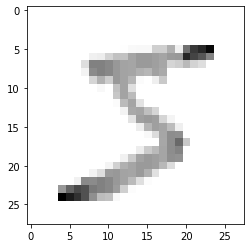

In [4]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)


(array([21.80748183,  0.48155323,  0.06879332,  0.27517327,  0.41275991,
         0.1719833 ,  0.41275991,  0.30956993,  0.82551982,  0.68793318,
         0.30956993,  0.41275991,  0.24077661,  0.06879332,  0.03439666,
         0.03439666,  0.03439666,  0.10318998,  0.03439666,  0.03439666,
         0.03439666,  0.06879332,  0.03439666,  0.        ,  0.06879332]),
 array([0.        , 0.03708239, 0.07416477, 0.11124716, 0.14832955,
        0.18541193, 0.22249432, 0.25957671, 0.29665909, 0.33374148,
        0.37082386, 0.40790625, 0.44498864, 0.48207102, 0.51915341,
        0.5562358 , 0.59331818, 0.63040057, 0.66748296, 0.70456534,
        0.74164773, 0.77873012, 0.8158125 , 0.85289489, 0.88997728,
        0.92705966]),
 <BarContainer object of 25 artists>)

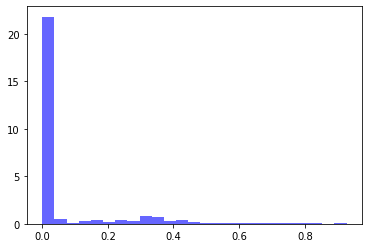

In [5]:
x=[]
for i in range(0,28):
    for j in range(0,28):
        x.append(x_train[0,i,j])
y = tuple(x)
plt.hist(y, bins=25, density=True, alpha=0.6, color='b')

Resizing the image to perform convolution layers on it .

In [6]:
x_trainr = np.array(x_train).reshape(-1,28,28,1)    #increasing one dimension for kernal operation.
x_testr = np.array(x_test).reshape(-1,28,28,1)    #increasing one dimension for kernal operation.
#-1 means the value that is still unknown
print(x_trainr.shape)
print(x_testr.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


Deep Learning Neural Network Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [8]:
#creating the model
model = Sequential()

#first convolution Layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))  #reduced the size for only first convolution layer
#filtered with 64 kernels with size 3,3
model.add(Activation('relu'))   #removes values less than zero and keeps >0 values
model.add(MaxPooling2D(pool_size=(2,2)))        
#from a matrix of 2x2 only maximum value is taken and as a result the original matrix is converted 
# to half it's value

#2nd convolution Layer
model.add(Conv2D(64,(3,3)))  
model.add(Activation('relu'))   
model.add(MaxPooling2D(pool_size=(2,2)))        

#3rd convolution Layer
model.add(Conv2D(64,(3,3)))  
model.add(Activation('relu'))   
model.add(MaxPooling2D(pool_size=(2,2)))   

In [9]:
#fully connected layers

# 1st fully connected layer
model.add(Flatten())    #to convert 2D array to 1D array
model.add(Dense(64))    #represents that each matrix is connected to 64 neurons
model.add(Activation('relu'))

#2nd fully connected layer
model.add(Dense(32))    #represents that each matrix is connected to 32 neurons
model.add(Activation('relu'))

#last fully connected layer
model.add(Dense(10))    #this must be equal to 10 beacuse we will be getting only 10 output values from 0-9
model.add(Activation('softmax'))    #softmax gives the class probabilities of each class

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [12]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)   
#Training the model.we divided the data in parts 30-70 where 30% is the validation data and rest is training data
#we did that to avoid overFiltting


Epoch 1/5
1313/1313 [==============================] - 59s 45ms/step - loss: 0.3134 - accuracy: 0.9017 - val_loss: 0.1383 - val_accuracy: 0.9568
Epoch 2/5
1313/1313 [==============================] - 39s 30ms/step - loss: 0.1052 - accuracy: 0.9672 - val_loss: 0.0770 - val_accuracy: 0.9768
Epoch 3/5
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0722 - accuracy: 0.9777 - val_loss: 0.0842 - val_accuracy: 0.9743
Epoch 4/5
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0584 - accuracy: 0.9820 - val_loss: 0.0671 - val_accuracy: 0.9813
Epoch 5/5
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0685 - val_accuracy: 0.9801


In [13]:
#Testing the model
test_loss , test_acc = model.evaluate(x_testr,y_test) 
print(test_loss)
print(test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0626 - accuracy: 0.9841
0.06259064376354218
0.9840999841690063


Prdeictions

Example 1

In [14]:
predictions = model.predict([x_testr])
print(predictions.shape)
#print(predictions)
#the predictions are coming as the 10 classes .pick the max probability to get the answer
print(np.argmax(predictions[0]))
#model predicted the first test image as 7   

313/313 [==============================] - 3s 10ms/step
(10000, 10)
7


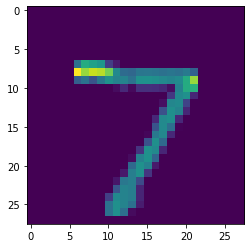

In [15]:
plt.imshow(x_test[0])   #so yes the model predicted right it is 7

Example 2

In [16]:
print(np.argmax(predictions[128]))

8


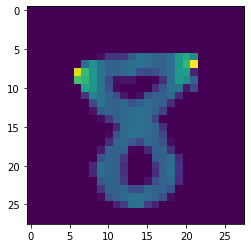

In [17]:
plt.imshow(x_test[128])

Example 3 : I made it through through paint PC

(648, 1152)
(28, 28)
(1, 28, 28, 1)


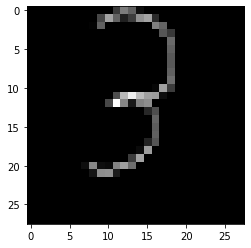

In [18]:
image = cv2.imread('three.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(gray.shape)   #324*576
#plt.imshow(gray)
resized_image = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
print(resized_image.shape)  #28*28
plt.imshow(resized_image , cmap='gray')

#normalising the image as our model is based on that
normal_image = tf.keras.utils.normalize(resized_image,axis=1)   #for 0 to 1 scaling

#increasing the dimension for kernal convolution operation
newImg = np.array(normal_image).reshape(-1,28,28,1)
print(newImg.shape)


In [19]:
#let's predict

predictions = model.predict(newImg)
print(np.argmax(predictions))

1/1 [==============================] - 0s 57ms/step
3


Hurray

HANDWRITTEN EXAMPLE

Original Image

(1103, 1280, 3)


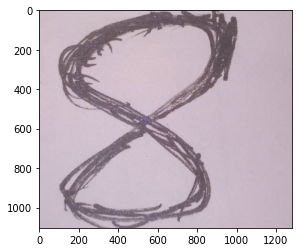

In [20]:
image = cv2.imread('eight3.jpg')
print(image.shape)
plt.imshow(image)

BGR to Gray Image

(1103, 1280)


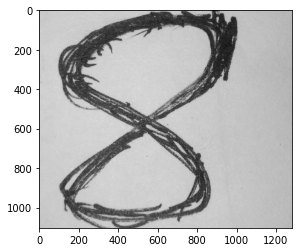

In [21]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray,cmap='gray')

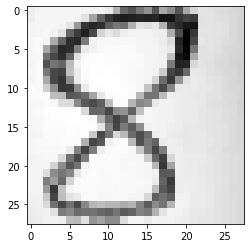

In [22]:
resized_image = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
plt.imshow(resized_image,cmap='gray')

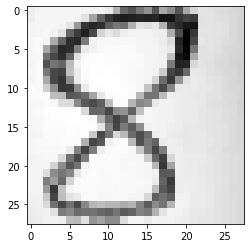

In [23]:
filtered_image = cv2.GaussianBlur(resized_image,(1,1),sigmaX=1,sigmaY=1)
plt.imshow(filtered_image,cmap='gray')

OTSU Threshold for edge detection and made black backgruond and white foreground

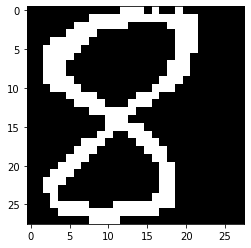

In [24]:
#Taking OTSU threshold and making the 
# ret,otsu= cv2.threshold(src=filtered_image,thresh=0,maxval=255, type = cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
ret = cv2.adaptiveThreshold(filtered_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,19,8)
# print(ret)
plt.imshow(ret,cmap='gray')

In [25]:
#normalising the image as our model is based on that
normal_image = tf.keras.utils.normalize(ret,axis=1)   #for 0 to 1 scaling

#increasing the dimension for kernal convolution operation
newImg2 = np.array(normal_image).reshape(-1,28,28,1)
print(newImg.shape)


(1, 28, 28, 1)


In [26]:
predictions = model.predict(newImg2)
print(np.argmax(predictions))

1/1 [==============================] - 0s 24ms/step
8


Testing

Original height and width = 793 1279
new height and width = 620 1000


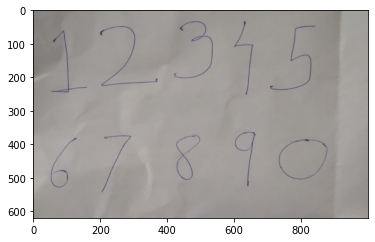

In [27]:
image = cv2.imread('zerotonine.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

h,w,c=image.shape
print(f'Original height and width = {h} {w}')

#resizing the image to make width 1000 and keeping aspect ratio same 
aspectRatio = w/h
if(w>1000):
    w = 1000
    h = int(w/aspectRatio)
    print(f'new height and width = {h} {w}')
    image = cv2.resize(image,(w,h),interpolation=cv2.INTER_AREA)


plt.imshow(image)
    

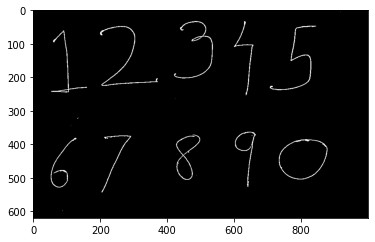

In [28]:
def thresholding(image):
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,19,8)
    plt.imshow(thresh,cmap='gray')
    return thresh

thresholdImage = thresholding(image)

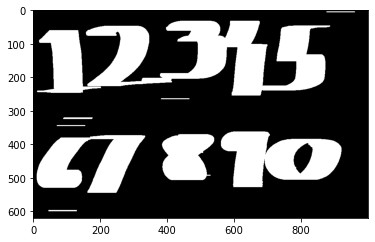

In [29]:
kernel = np.ones((3,85),np.uint8)
# print(kernel)
dilatedImage = cv2.dilate(thresholdImage,kernel=kernel,iterations=1)
plt.imshow(dilatedImage,cmap='gray')

In [30]:
(contours,heirarchy) = cv2.findContours(dilatedImage.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
sorted_contour_lines = sorted(contours,key=lambda ctr : cv2.boundingRect(ctr)[1])#x,y,,w,h

10


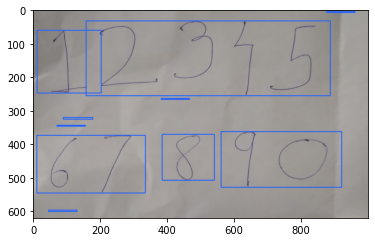

In [31]:
tempImage = image.copy()
count =0 
for ctr in sorted_contour_lines :
    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(tempImage, (x,y), (x+w,y+h),(40,100,250),2)
    count = count + 1

plt.imshow(tempImage)
print(count)


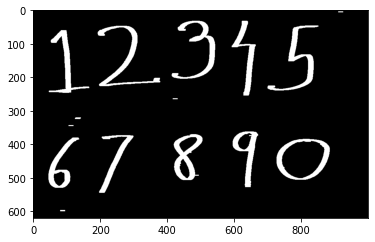

In [32]:
#dialation
kernel = np.ones((3,15),np.uint8)
dilatedImage2 = cv2.dilate(thresholdImage,kernel=kernel,iterations=1)
plt.imshow(dilatedImage2,cmap='gray')


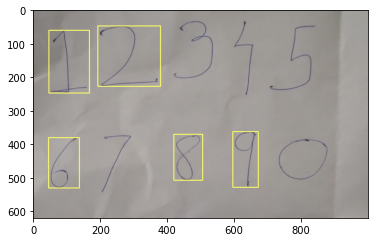

In [33]:
tempImage2 = image.copy()
wordList = []

for line in sorted_contour_lines:
    #roi of each line .selecting  first line words from dilatedImage2
    x,y,w,h = cv2.boundingRect(line)
    roi_line = dilatedImage2[y:y+h,x:x+h]
    #drawing contours on each word
    (cnt,heirarchy) = cv2.findContours(roi_line.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt,key=lambda cntr : cv2.boundingRect(cntr)[0])#x,y,,w,h

    for word in sorted_contour_words:
        if(cv2.contourArea(word)<400):
            continue
        x2,y2,w2,h2 = cv2.boundingRect(word)
        wordList.append([x+x2,y+y2,x+x2+w2,y+y2+h2])
        cv2.rectangle(tempImage2,(x+x2,y+y2),(x+x2+w2,y+y2+h2),(255,255,100),2)

plt.imshow(tempImage2)

[193, 47, 380, 227]
1/1 [==============================] - 0s 16ms/step
1
[47, 60, 168, 247]
1/1 [==============================] - 0s 24ms/step
1
[596, 362, 672, 528]
1/1 [==============================] - 0s 25ms/step
7
[420, 370, 506, 507]
1/1 [==============================] - 0s 26ms/step
8
[46, 380, 138, 530]
1/1 [==============================] - 0s 21ms/step
6


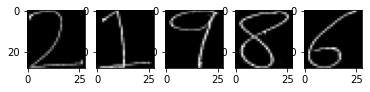

In [34]:
for (index,word) in enumerate(wordList,start=0):
    print(word)
    # wordImage = image[word[1]:word[3],word[0]:word[2]]
    # plt.subplot(1,len(wordList),index+1)
    # plt.imshow(image[word[1]:word[3],word[0]:word[2]])
    # plt.imshow(ret)
    crop_img = image[word[1]:word[3],word[0]:word[2]]
    crop_img = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
    # cv2.imwrite(f'file{index}.jpg',crop_img)
    ret = cv2.adaptiveThreshold(crop_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,19,8)
    ret = cv2.resize(ret,(28,28),interpolation=cv2.INTER_AREA)
    plt.subplot(1,len(wordList),index+1)
    plt.imshow(ret,cmap='gray')
    normal_image = tf.keras.utils.normalize(ret,axis=1)
    newImg2 = np.array(normal_image).reshape(-1,28,28,1)
    predictions = model.predict(newImg2)
    print(np.argmax(predictions))

